In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2
import random
from random import randint
import time

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import numpy as np
import fastai
import matplotlib.pyplot as plt

In [8]:
path = Path("sharks")
path.ls()

(#14) [Path('sharks/basking'),Path('sharks/blacktip'),Path('sharks/blue'),Path('sharks/bull'),Path('sharks/hammerhead'),Path('sharks/lemon'),Path('sharks/mako'),Path('sharks/nurse'),Path('sharks/sand tiger'),Path('sharks/thresher')...]

In [9]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=32,batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)

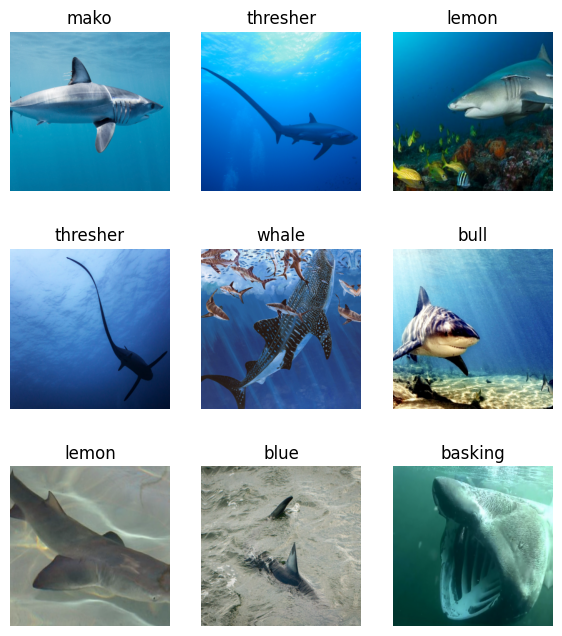

In [10]:
data.show_batch(nrows=3, figsize=(7,8))


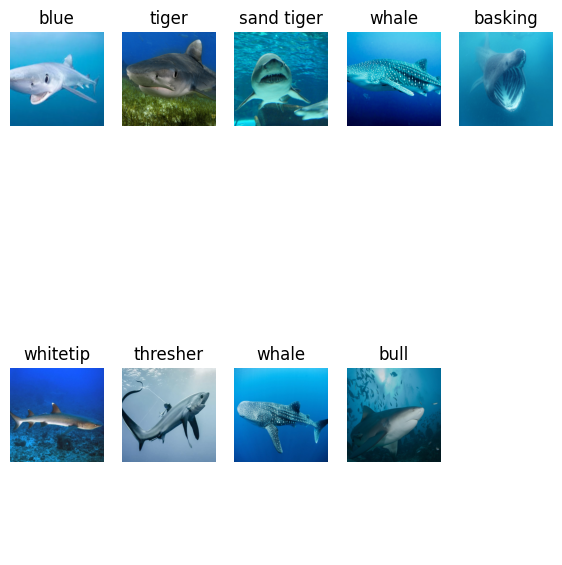

In [11]:
data.show_batch(nrows=2, figsize=(7,8))

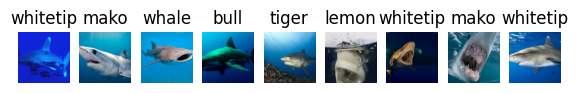

In [12]:
data.show_batch(nrows=1, figsize=(7,8))

In [13]:
def _add1(x): return x+1
dumb_tfm = RandTransform(enc=_add1, p=0.5)
start,d1,d2 = 2,False,False
for _ in range(40):
    t = dumb_tfm(start, split_idx=0)
    if dumb_tfm.do: test_eq(t, start+1); d1=True
    else:           test_eq(t, start)  ; d2=True
assert d1 and d2
dumb_tfm

_add1 -- {'p': 0.5}:
encodes: (object,object) -> _add1decodes: 

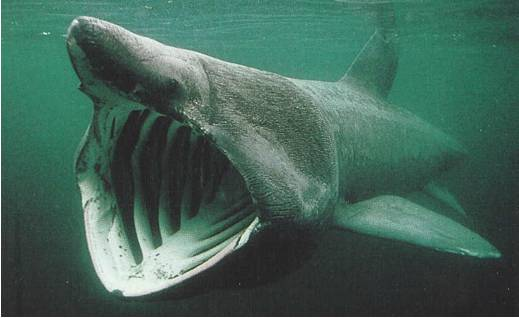

In [14]:
from PIL import Image

img = Image.open("sharks/basking/00000028.jpg")
img

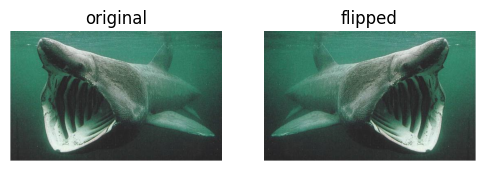

In [15]:
_,axs = subplots(1,2)
show_image(img, ctx=axs[0], title='original')
show_image(img.flip_lr(), ctx=axs[1], title='flipped');

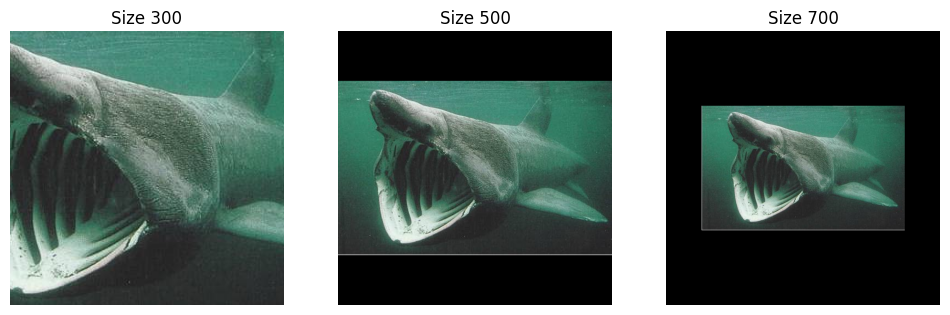

In [16]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img.crop_pad(sz), ctx=ax, title=f'Size {sz}');

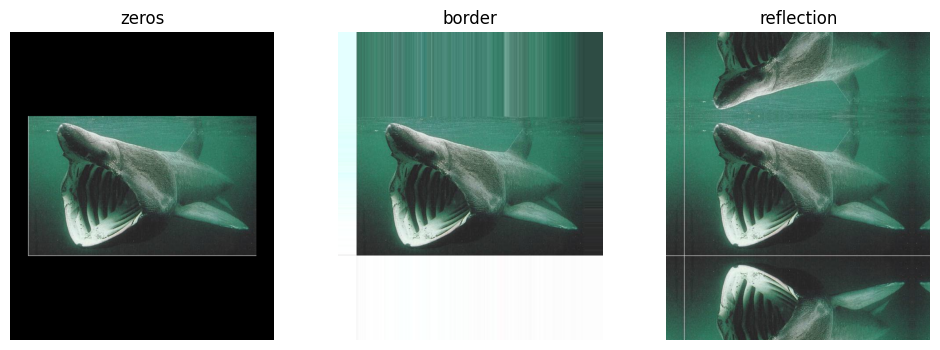

In [17]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img.crop_pad((600,700), pad_mode=mode), ctx=ax, title=mode);

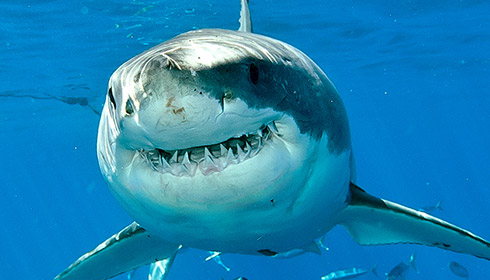

In [18]:
from PIL import Image

img2 = Image.open("sharks/white/00000026.jpg")
img2

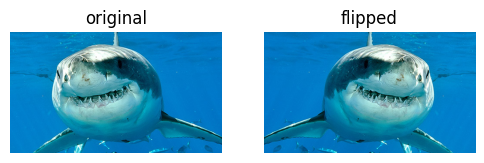

In [19]:
_,axs = subplots(1,2)
show_image(img2, ctx=axs[0], title='original')
show_image(img2.flip_lr(), ctx=axs[1], title='flipped');

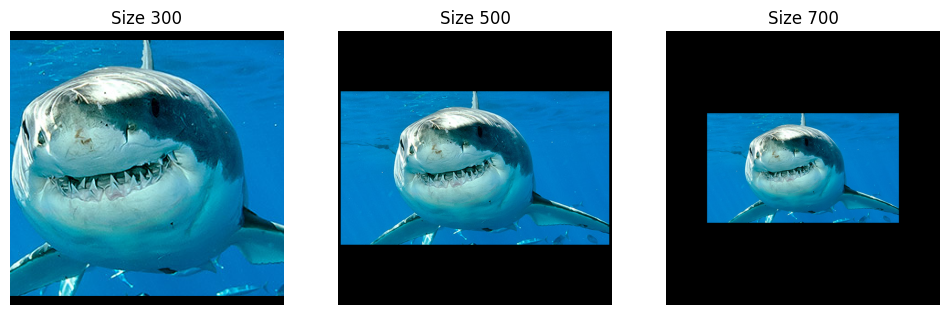

In [20]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img2.crop_pad(sz), ctx=ax, title=f'Size {sz}');

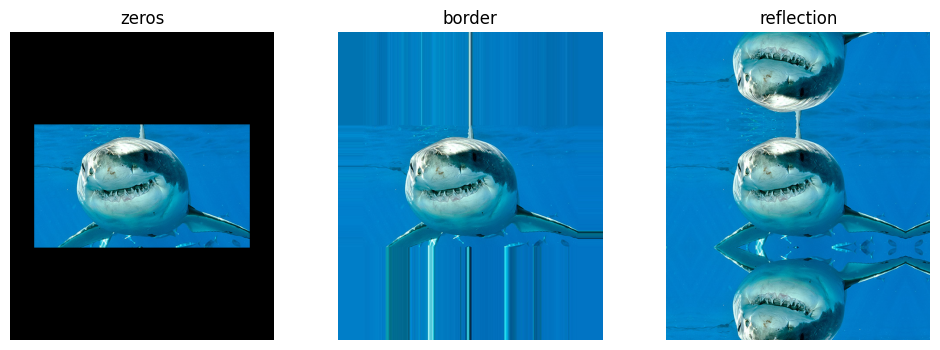

In [21]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img2.crop_pad((600,700), pad_mode=mode), ctx=ax, title=mode);